In [10]:

import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
from os import path 
import time
print("started")

started


In [11]:
# datasets_folder = "E:\\dataset\\main_project\\datasets"
datasets_folder = "/media/abk/DATA 2/dataset/main_project_updated/datasets"
# elephant_dataset = path.join(datasets_folder,"elephant")
# wild_board_dataset = path.join(datasets_folder,"wild_boar")
# bird_dataset = path.join(datasets_folder,"bird")



batch_size = 64
img_height = 180
img_width = 180

In [12]:
color_mode = "grayscale"
train_ds = keras.utils.image_dataset_from_directory(
    datasets_folder,
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode=color_mode,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 6900 files belonging to 5 classes.
Using 5520 files for training.


In [13]:

val_ds = keras.utils.image_dataset_from_directory(
    datasets_folder,
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode=color_mode,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 6900 files belonging to 5 classes.
Using 1380 files for validation.


['bird', 'elephant', 'person', 'undetected', 'wild_boar']


2023-04-03 16:43:33.181212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


finished


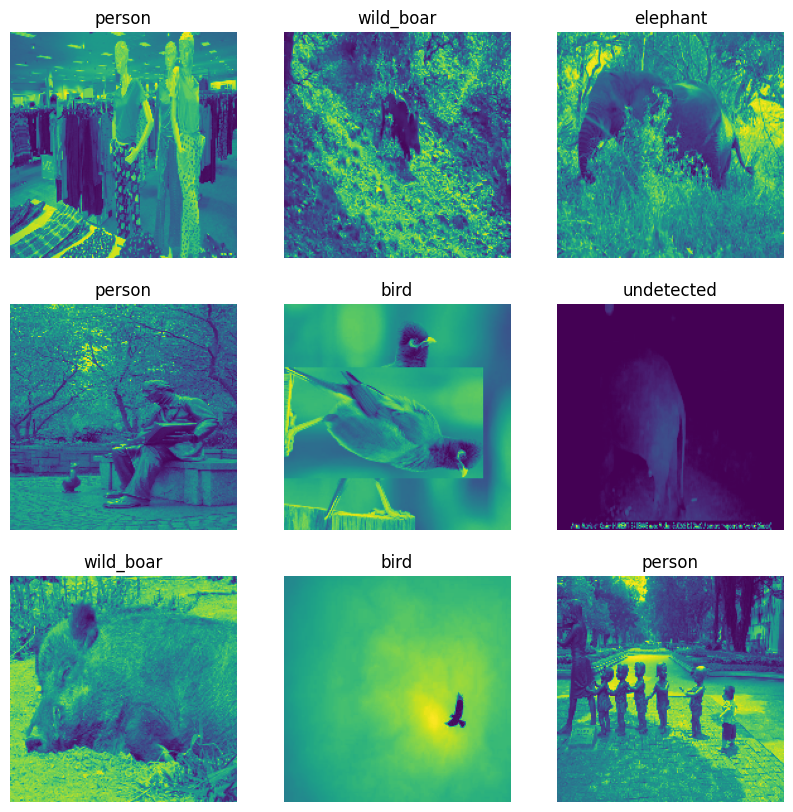

In [14]:
class_names = train_ds.class_names 
print(class_names)
class_len = len(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    
print("finished")






In [15]:
AUTOTUNE = tf.data.AUTOTUNE 

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
print("finished")



finished


In [16]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  1)),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

In [17]:
model = keras.models.Sequential([
    # data_augmentation,
    keras.layers.Rescaling(1./255, input_shape=(img_height,img_width,1)),
    keras.layers.Conv2D(16,3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3, activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(class_len , activation='softmax')

])

model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 64)       

In [18]:
epochs =  45
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs , verbose=1)

Epoch 1/45


2023-04-03 16:43:37.422700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 16:43:38.649534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 16:43:38.999634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 16:43:39.400863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 16:43:48.080880: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 36 of 1000
2023-04-03 16:43:48.877475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 16:43:53.961378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 16:43:54.648371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 16:43:57.457306: W tensorflow

87/87 [==============================] - ETA: 0s - loss: 1.1487 - accuracy: 0.5397

2023-04-03 16:44:38.716661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 16:44:44.467778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 16:44:45.544053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 16:44:45.813356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 16:44:54.456396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-03 16:44:54.769370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


87/87 [==============================] - 83s 373ms/step - loss: 1.1487 - accuracy: 0.5397 - val_loss: 0.9105 - val_accuracy: 0.6435
Epoch 2/45
87/87 [==============================] - 6s 67ms/step - loss: 0.7933 - accuracy: 0.7025 - val_loss: 0.7207 - val_accuracy: 0.7449
Epoch 3/45
87/87 [==============================] - 6s 67ms/step - loss: 0.5885 - accuracy: 0.7880 - val_loss: 0.6156 - val_accuracy: 0.7696
Epoch 4/45
87/87 [==============================] - 6s 67ms/step - loss: 0.3969 - accuracy: 0.8574 - val_loss: 0.6293 - val_accuracy: 0.7819
Epoch 5/45
87/87 [==============================] - 6s 68ms/step - loss: 0.2640 - accuracy: 0.9076 - val_loss: 0.6371 - val_accuracy: 0.7819
Epoch 6/45
87/87 [==============================] - 6s 67ms/step - loss: 0.1613 - accuracy: 0.9498 - val_loss: 0.7748 - val_accuracy: 0.7920
Epoch 7/45
87/87 [==============================] - 6s 68ms/step - loss: 0.1025 - accuracy: 0.9699 - val_loss: 0.8065 - val_accuracy: 0.7964
Epoch 8/45
87/87 [====

In [19]:
acc = history.history['val_accuracy']
print(acc)
final_acc = acc[len(acc) - 1]
ts = time.time()

model.save(f"m(u-1,e-{epochs})-{round(final_acc,4)}-(h-det,ud)(added-bird-datas,data_augmentation).h5")

[0.643478274345398, 0.7449275255203247, 0.769565224647522, 0.7818840742111206, 0.7818840742111206, 0.7920289635658264, 0.7963768243789673, 0.8050724864006042, 0.7963768243789673, 0.8014492988586426, 0.7992753386497498, 0.8014492988586426, 0.8036231994628906, 0.8007246255874634, 0.8014492988586426, 0.7985507249832153, 0.8028985261917114, 0.7992753386497498, 0.802173912525177, 0.8014492988586426, 0.8007246255874634, 0.7992753386497498, 0.8007246255874634, 0.8014492988586426, 0.800000011920929, 0.8007246255874634, 0.7992753386497498, 0.8007246255874634, 0.8014492988586426, 0.802173912525177, 0.8007246255874634, 0.8014492988586426, 0.802173912525177, 0.8007246255874634, 0.802173912525177, 0.8007246255874634, 0.802173912525177, 0.8014492988586426, 0.800000011920929, 0.800000011920929, 0.8036231994628906, 0.800000011920929, 0.802173912525177, 0.7985507249832153, 0.8036231994628906]


1/1 [==============================] - 0s 255ms/step
animal : bird | accuracy :  99.94
animal : elephant | accuracy :  0.0
animal : person | accuracy :  0.06
animal : undetected | accuracy :  0.0
animal : wild_boar | accuracy :  0.0


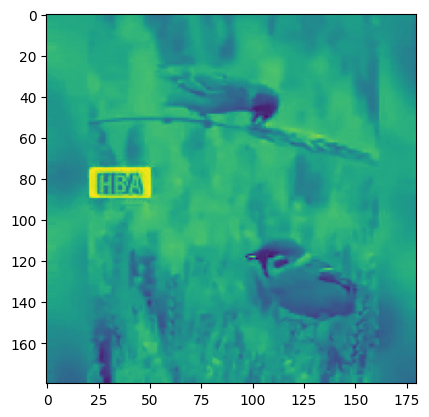

: 

In [20]:
img = tf.keras.utils.load_img(
    "test/b1.jpg",
    target_size = (img_height,img_width),
    color_mode = color_mode 
)


img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)

# score = tf.nn.softmax(predictions[0])
score = predictions[0]

print(f"animal : {class_names[0]} | accuracy :  {round(np.array(score)[0] * 100,2)}")
print(f"animal : {class_names[1]} | accuracy :  {round(np.array(score)[1] * 100,2)}")
print(f"animal : {class_names[2]} | accuracy :  {round(np.array(score)[2] * 100,2)}")
if len(class_names) > 3 :
    print(f"animal : {class_names[3]} | accuracy :  {round(np.array(score)[3] * 100,2)}")
if len(class_names) > 4 :
    print(f"animal : {class_names[4]} | accuracy :  {round(np.array(score)[4] * 100,2)}")
plt.imshow(img)
